In [132]:
import k2

In [133]:
import k2.ragged as k2r

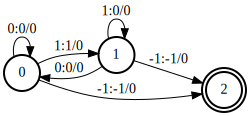

In [134]:
a_fsa = k2.ctc_topo(max_token=1)
k2.to_dot(a_fsa)

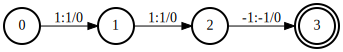

In [135]:
s2 = '''
0 1 1 1 0
1 2 1 1 0
2 3 -1 -1 0
3
'''
b_fsa = k2.Fsa.from_str(s2, acceptor=False)
k2.to_dot(b_fsa)

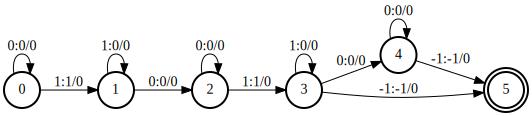

In [136]:
c_fsa = k2.compose(a_fsa, b_fsa, treat_epsilons_specially=True)
k2.to_dot(c_fsa)

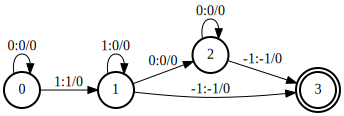

In [173]:
c_fsa = k2.ctc_graph([[1], [1]])
k2.to_dot(c_fsa[0])

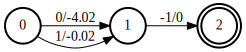

In [174]:
import torch
t = torch.tensor([
    [[1., 5.]],
    [[5., 3.]],
])
nn_output = torch.log(torch.softmax(t, 2))
supervision_segments = torch.tensor([[0, 0, 1], [1, 0, 1]]).to(torch.int32)
d_fsa = k2.DenseFsaVec(nn_output, supervision_segments)
d_fsa_vec = k2.convert_dense_to_fsa_vec(d_fsa)
k2.to_dot(d_fsa_vec[0])

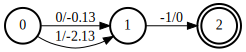

In [175]:
k2.to_dot(d_fsa_vec[1])

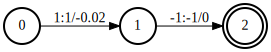

In [181]:
e_fsa = k2.intersect_dense(c_fsa, d_fsa, output_beam=20.0, a_to_b_map=torch.tensor([0, 1]).to(torch.int32))
k2.to_dot(e_fsa[0])

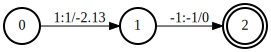

In [182]:
k2.to_dot(e_fsa[1])

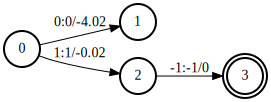

In [187]:
b_to_a_map = torch.tensor([0, 1]).to(torch.int32)
f_fsa = k2.intersect_device(c_fsa, d_fsa_vec, b_to_a_map)
k2.to_dot(f_fsa[0])

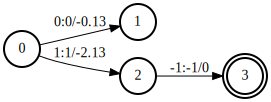

In [188]:
k2.to_dot(f_fsa[1])